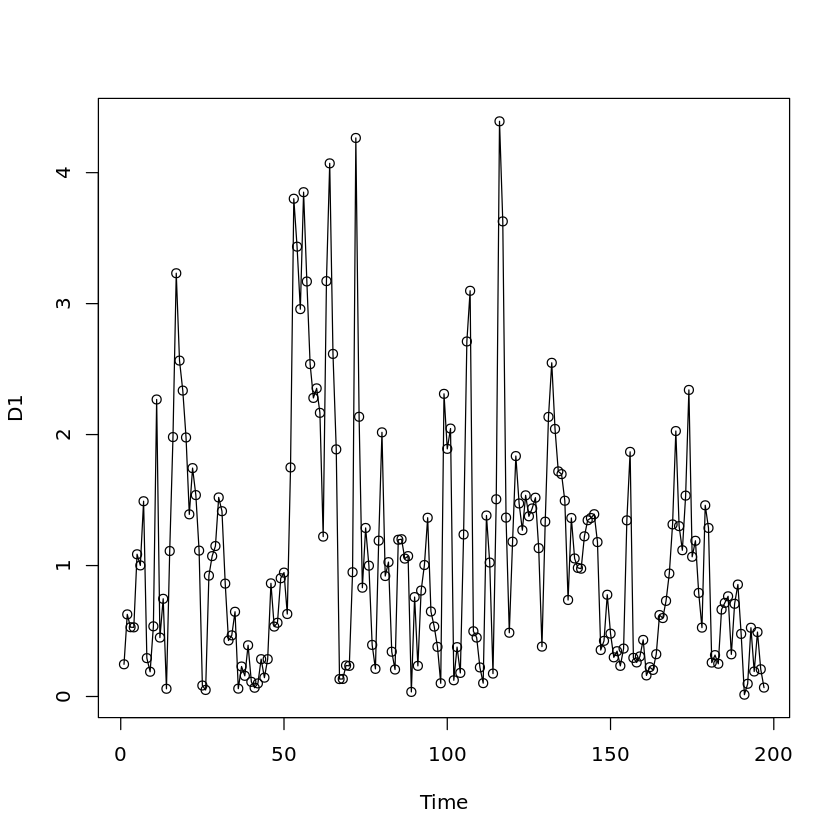

In [1]:
D <- read.csv("http://nmimoto.github.io/datasets/copper.csv")
D1 <- ts(D[,2], start=1) # Extract only second column s time series
plot(D1, type="o")

In [2]:
library(forecast)
source('https://nmimoto.github.io/R/TS-00.txt')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




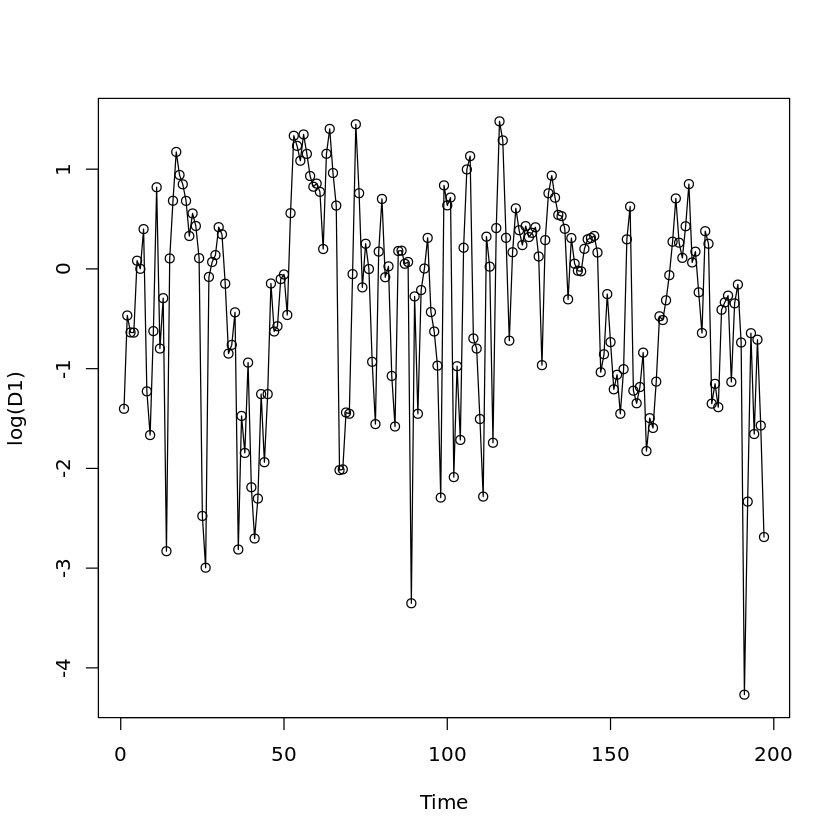

In [3]:
plot(log(D1), type="o")

In [4]:
BoxCox.lambda(D1)

[1] 0.2283439

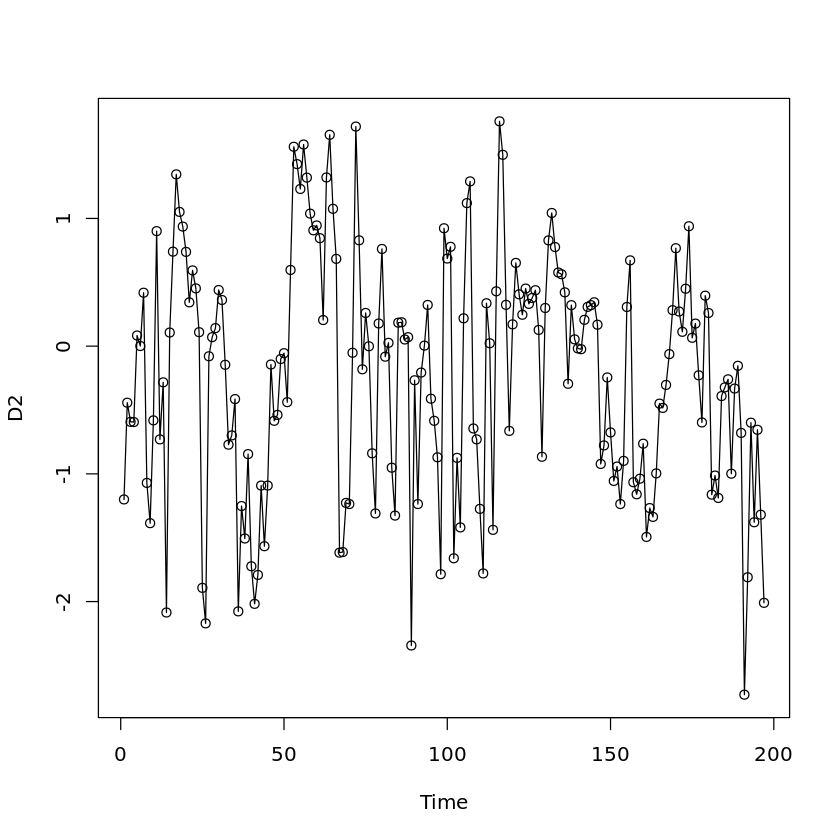

In [5]:
D2 <- BoxCox(D1, 0.228)
plot(D2, type="o")

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0,0,0,0.191,0.383,0.194,0.926


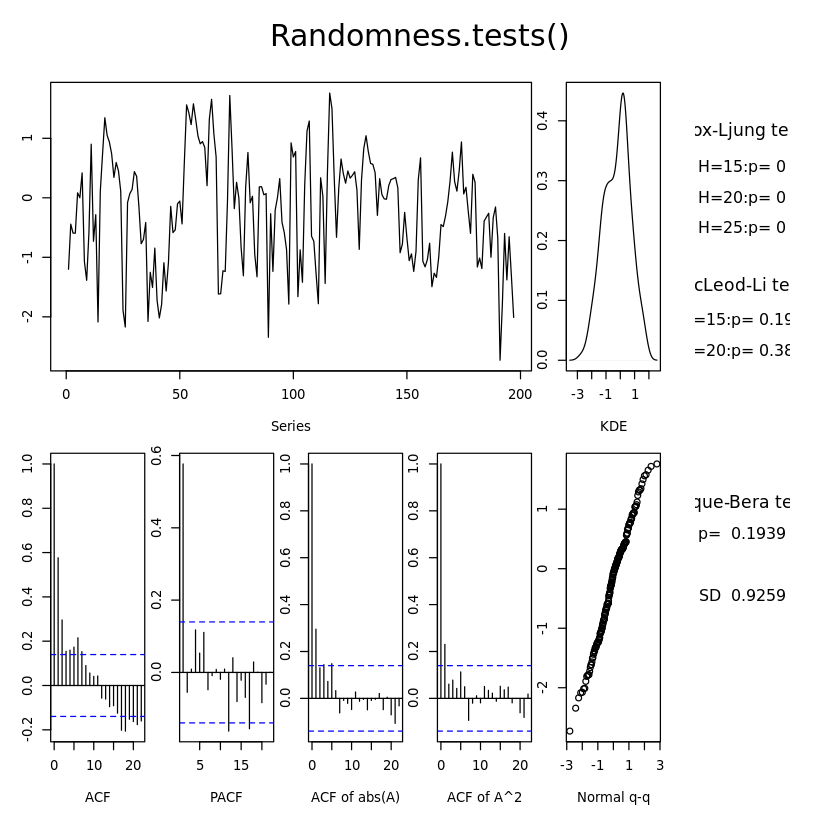

In [6]:
Randomness.tests(D2)

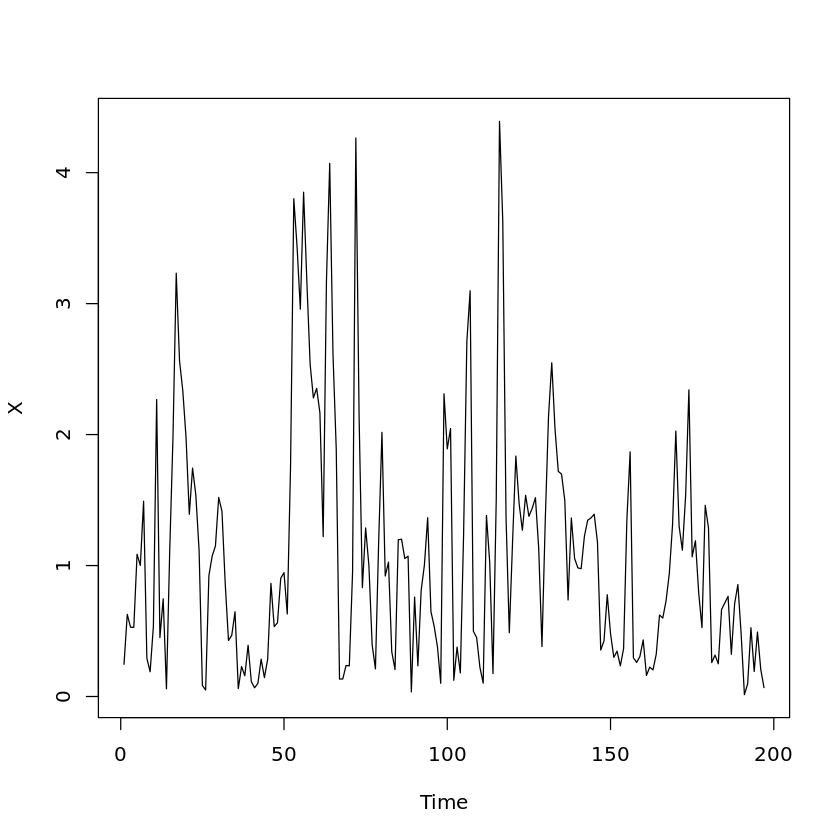

In [7]:
# To transform back
X <- InvBoxCox(D2, 0.228)
plot(X)

# Transform and forecast

In [8]:
auto.arima(D2, stepwise = FALSE, approximation = FALSE)

Series: D2 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1     mean
      0.5883  -0.2406
s.e.  0.0582   0.1289

sigma^2 estimated as 0.5679:  log likelihood=-223
AIC=452   AICc=452.12   BIC=461.85

In [9]:
Fit01 <- Arima(D2, order=c(1,0,0), include.mean = FALSE)
Fit01

Series: D2 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.6115
s.e.  0.0572

sigma^2 estimated as 0.5744:  log likelihood=-224.65
AIC=453.29   AICc=453.36   BIC=459.86

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.538,0.548,0.455,0.192,0.16,0.016,0.752


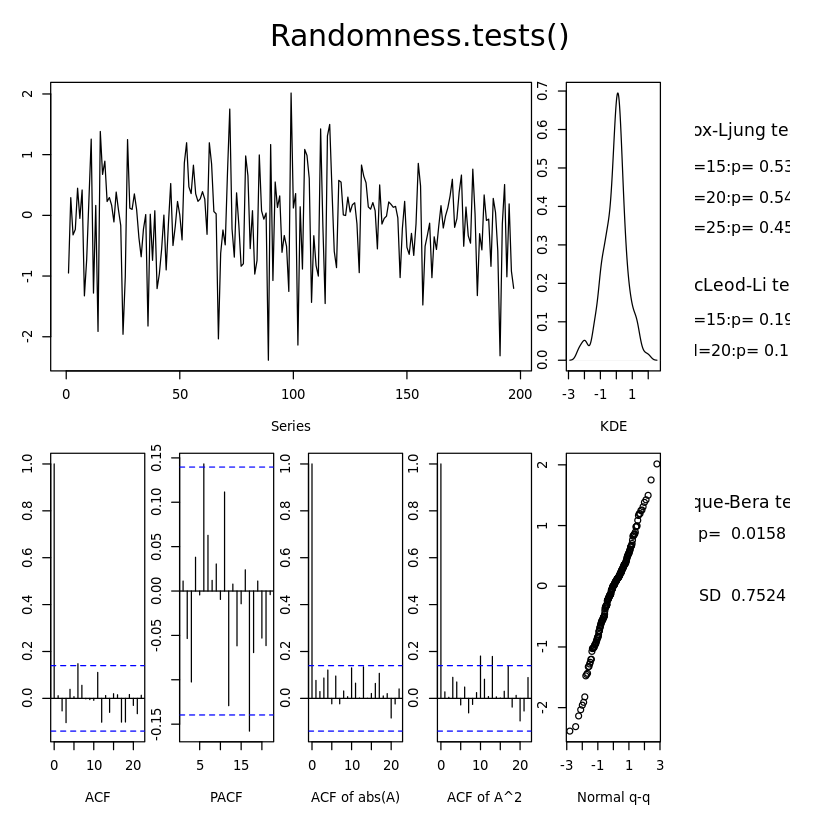

In [10]:
Randomness.tests(Fit01$resid)

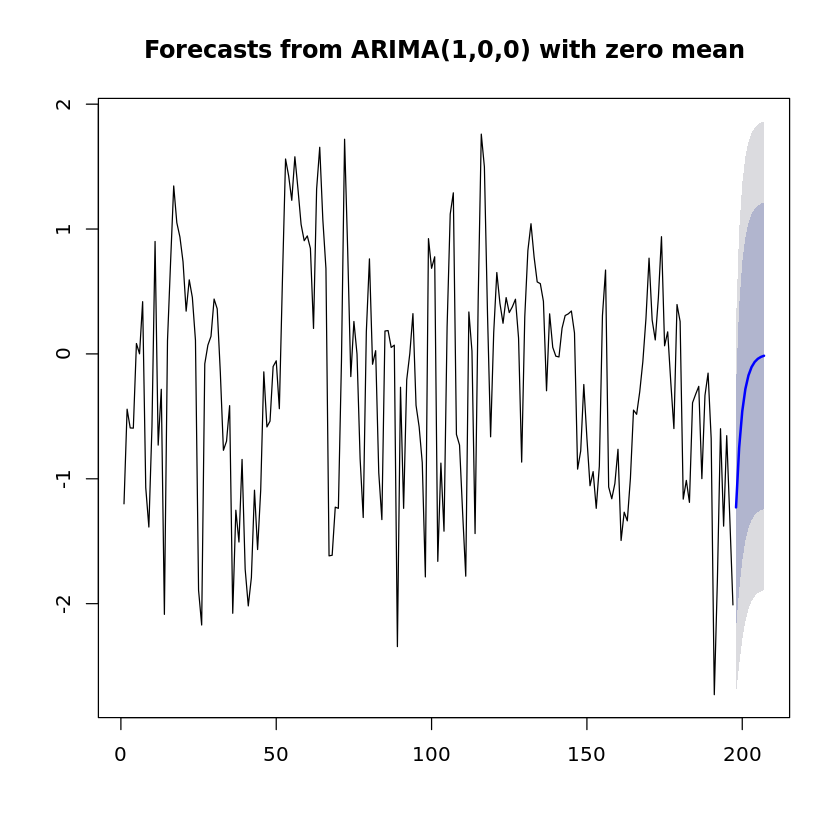

In [11]:
plot(forecast(Fit01, 10))

## Do the transform and inverse-transformation automatically

In [12]:
auto.arima(D1, lambda=0.228, stepwise = FALSE, approximation = FALSE)

Series: D1 
ARIMA(1,0,0) with non-zero mean 
Box Cox transformation: lambda= 0.228 

Coefficients:
         ar1     mean
      0.5883  -0.2406
s.e.  0.0582   0.1289

sigma^2 estimated as 0.5679:  log likelihood=-223
AIC=452   AICc=452.12   BIC=461.85

In [13]:
Fit02 <- Arima(D1, order=c(1,0,0), lambda = 0.228, include.mean = FALSE)
Fit02

Series: D1 
ARIMA(1,0,0) with zero mean 
Box Cox transformation: lambda= 0.228 

Coefficients:
         ar1
      0.6115
s.e.  0.0572

sigma^2 estimated as 0.5744:  log likelihood=-224.65
AIC=453.29   AICc=453.36   BIC=459.86

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.538,0.548,0.455,0.192,0.16,0.016,0.752


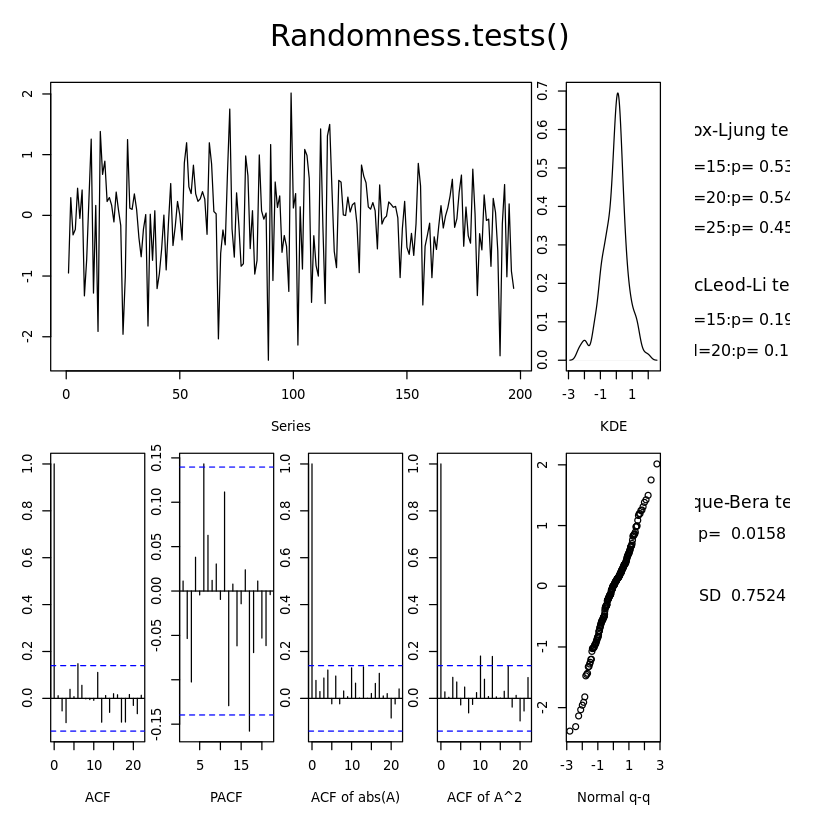

In [14]:
Randomness.tests(Fit02$resid)

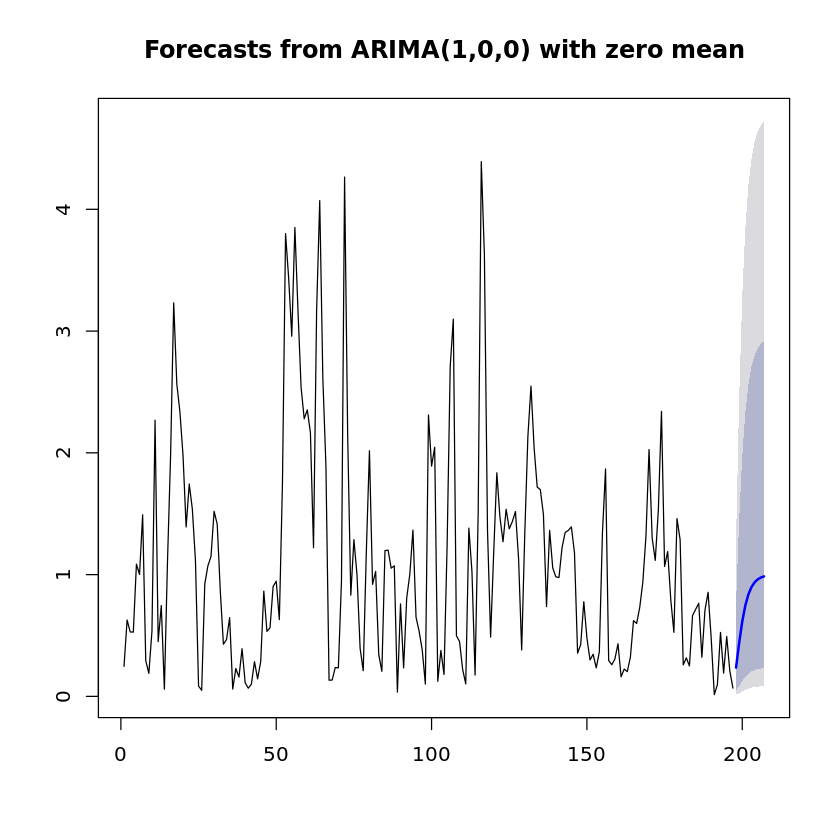

In [15]:
plot(forecast(Fit02, 10))

In [22]:
# Rolling 1-step prediction with fixed window
library(forecast)
Y <- D1              # Entire data
window.size <- 150   # Window sizze for estimation
order.in <- c(1,0,0) # Model order
include_mean <- FALSE
this_lambda <- 0.228

Yhat.CIl <- 0
Yhat.CIu <- 0
Yhat <- 0

for (i in 1:(length(Y)-window.size)) {
    # Force to fit the model
    Fit00 <- Arima(Y[i:(i+window.size-1)], order=order.in, include.mean = include_mean, lambda = this_lambda)
    Y.h <- forecast(Fit00, 1)
    Yhat[i] <- Y.h$mean
    Yhat.CIu[i] <- Y.h$upper[2]
    Yhat.CIl[i] <- Y.h$lower[2]
}

Yhat = ts(Yhat, start=time(Y)[window.size+1], freq = frequency(Y))
Yhat.CIu = ts(Yhat.CIu, start=time(Y)[window.size+1], freq=frequency(Y))
Yhat.CIl = ts(Yhat.CIl, start=time(Y)[window.size+1], freq=frequency(Y))
Y1 = window(Y, end=time(Y)[window.size], freq=frequency(Y))
Y2 = window(Y, start=time(Y)[window.size+1], freq=frequency(Y))

Pred.error = Y2 - Yhat
Pred.rMSE = sqrt(mean((Pred.error)^2))
c(mean(Pred.error), Pred.rMSE)

[1] -0.08001851  0.44158305

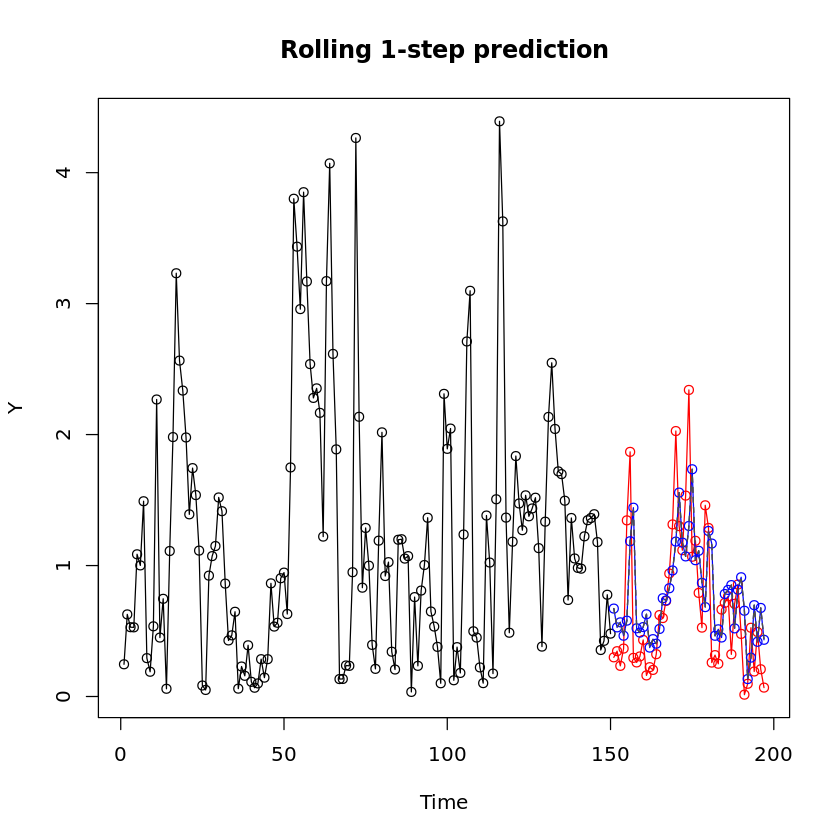

In [23]:
plot(Y, type="n", main="Rolling 1-step prediction")
lines(Y1, type="o")
lines(Y2, type="o", col="red")
lines(Yhat, type="o", col="blue")
lines(Yhat, type="l", col="gray30", lty=2)
lines(Yhat, type="l", col="gray30", lty=2)

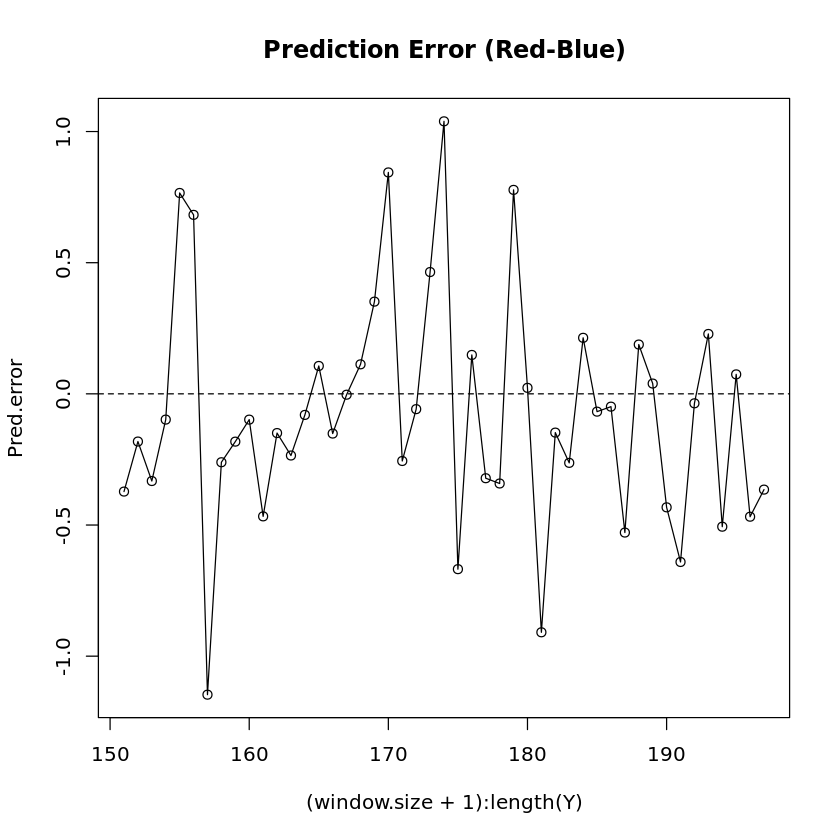

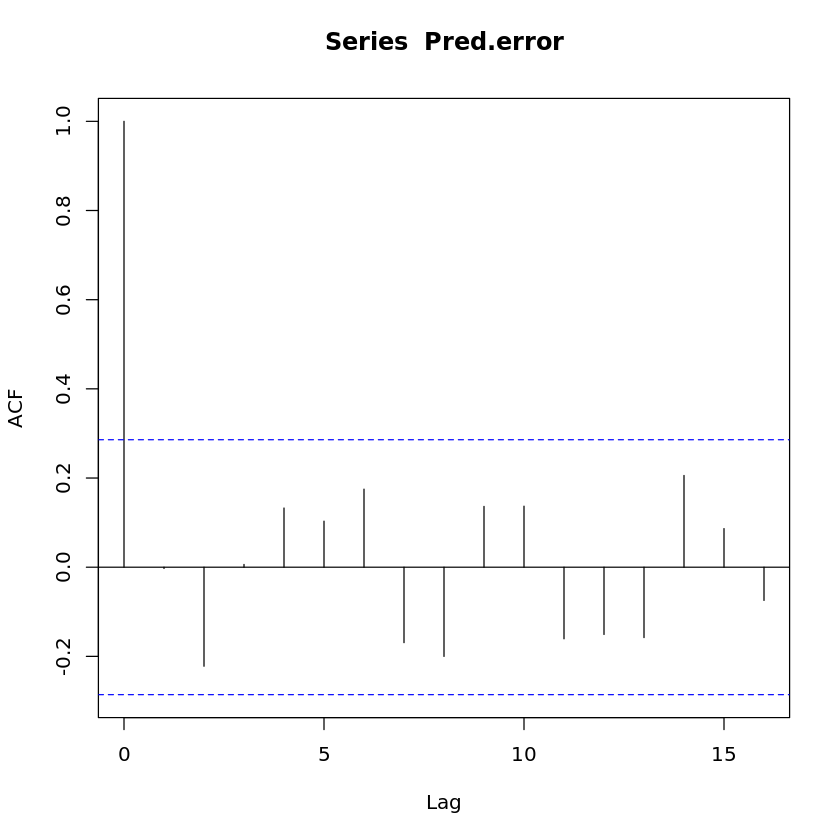

In [24]:
plot((window.size+1):length(Y), Pred.error, type="o", main="Prediction Error (Red-Blue)")
abline(h=0, lty=2)
acf(Pred.error)

In [25]:
sqrt(Fit02$sigma2)

[1] 0.7578715

In [ ]:
0